##### SKIN DISEASE CLASSIFICATION MODEL USING CONVOLUTION NEURAL NETWORKS


In [ ]:
# importing basis dependancies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers #typeignore
from tensorflow.keras.models import Sequential
import pandas as pd
import os

2025-03-08 14:10:05.805082: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-08 14:10:05.818672: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-08 14:10:05.862714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741432205.913161   14297 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741432205.935284   14297 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 14:10:05.984514: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [ ]:
# path to image dataset
dataset_dir = "/home/azureuser/cloudfiles/code/Skin Diseases Dataset"  

##### Data wrangling


In [4]:
# Data cleaning
def load_image(file_path):
    try:
        image = tf.io.read_file(file_path)
        tf.image.decode_image(image) 
        return True 
    except Exception as e:
        print(f"Error loading image {file_path}: {e}")
        return False 

def clean_dataset(directory):
    corrupted_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if not load_image(file_path):
                corrupted_files.append(file_path)

    # Delete corrupted files
    for file_path in corrupted_files:
        print(f"Deleting corrupted file: {file_path}")
        os.remove(file_path)

    print(f"Deleted {len(corrupted_files)} corrupted images.")

# Run the cleaning function
clean_dataset(dataset_dir)


2025-03-07 20:10:47.709814: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-07 20:11:35.116484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-03-07 20:12:15.365058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:12:21.533171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


Deleted 0 corrupted images.


##### Path to cleaned test, train and validation data set


In [ ]:
data_train_path = "/home/azureuser/cloudfiles/code/Skin Diseases Dataset/train" 
data_test_path = "/home/azureuser/cloudfiles/code/Skin Diseases Dataset/test" 
data_val_path = "/home/azureuser/cloudfiles/code/Skin Diseases Dataset/validation" 

In [4]:
img_width,img_height = 180,180

##### Uploading image dataset for training and validation


In [5]:
data_train = tf.keras.utils.image_dataset_from_directory( 
data_train_path, 
shuffle = True, 
image_size = (img_width,img_height), 
batch_size = 32, 
validation_split = False 
) 

Found 5186 files belonging to 17 classes.


2025-03-08 14:11:24.654366: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
data_val = tf.keras.utils.image_dataset_from_directory( 
data_val_path, 
shuffle = False, 
image_size = (img_width,img_height), 
batch_size = 32, 
validation_split = False 
) 

Found 1206 files belonging to 17 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['acne',
 'actinickeratosis',
 'alopeciaareata',
 'chickenpox',
 'cold sores',
 'eczema',
 'folliculitis',
 'hives',
 'impetigo',
 'melanoma',
 'psoriasis',
 'ringworm',
 'rosacea',
 'shingles',
 'uticaria',
 'vitiligo',
 'warts']

##### Visualizing to check whether the images has been loaded successfully


2025-03-07 20:15:13.526000: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


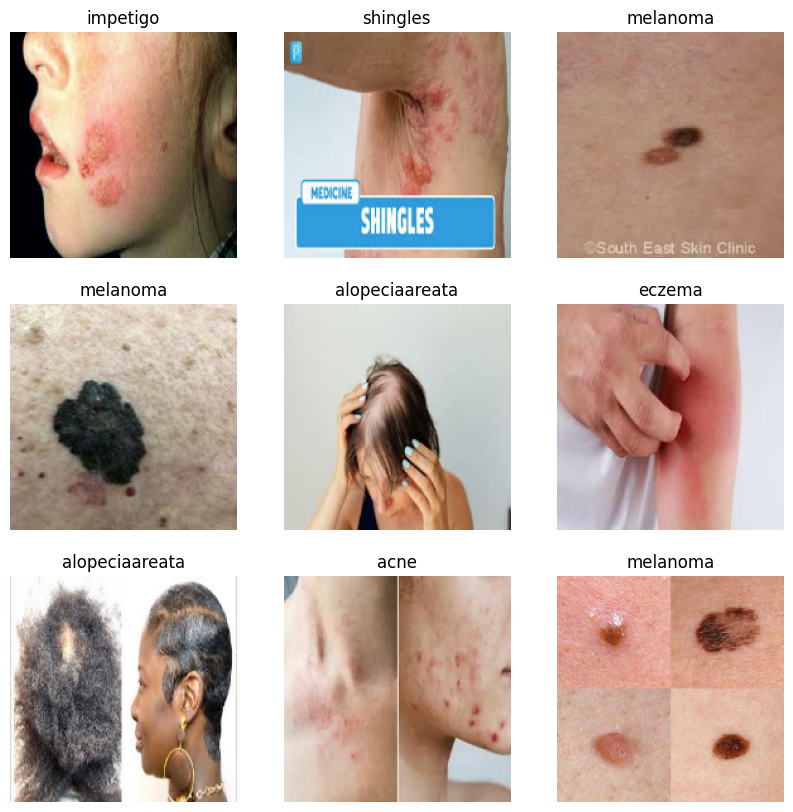

In [12]:
plt.figure(figsize=(10,10)) 
for image,label in data_train.take(1): 
    for i in range(9): 
        plt.subplot(3,3,i+1) 
        plt.imshow(image[i].numpy().astype('uint8')) 
        plt.title(data_cat[label[i]]) 
        plt.axis('off') 

##### Initializing CNN MODEL for training


In [13]:
model = Sequential([ 
layers.Rescaling(1./255), 
layers.Conv2D(16,3,padding='same',activation='relu'), 
layers.MaxPooling2D(), 
layers.Conv2D(32,3,padding='same',activation='relu'), 
layers.MaxPooling2D(), 
layers.Conv2D(64,3,padding='same',activation='relu'), 
layers.MaxPooling2D(), 
layers.Flatten(), 
layers.Dropout(0.2), 
layers.Dense(128), 
layers.Dense(len(data_cat)) 
]) 

In [14]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics =['accuracy']) 

In [ ]:
epoch_size = 30

In [16]:
history = model.fit(data_train,validation_data=data_val,epochs = epoch_size) 

Epoch 1/30


140/162 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.0987 - loss: 3.3109

2025-03-07 20:16:31.273357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.1019 - loss: 3.2468

2025-03-07 20:16:39.555401: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:16:41.003437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 33s 189ms/step - accuracy: 0.1020 - loss: 3.2443 - val_accuracy: 0.1202 - val_loss: 2.7771
Epoch 2/30
150/162 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.1996 - loss: 2.5320

2025-03-07 20:17:03.464029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.2013 - loss: 2.5283

2025-03-07 20:17:10.237076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:17:11.628898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 31s 189ms/step - accuracy: 0.2014 - loss: 2.5280 - val_accuracy: 0.1733 - val_loss: 2.8585
Epoch 3/30
156/162 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.2925 - loss: 2.2770

2025-03-07 20:17:34.802859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.2933 - loss: 2.2740

2025-03-07 20:17:40.477373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:17:41.810389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 30s 186ms/step - accuracy: 0.2935 - loss: 2.2735 - val_accuracy: 0.2297 - val_loss: 2.5574
Epoch 4/30
128/162 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.4073 - loss: 1.8957

2025-03-07 20:18:00.836875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.4113 - loss: 1.8815

2025-03-07 20:18:10.827157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:18:12.271524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 31s 188ms/step - accuracy: 0.4114 - loss: 1.8811 - val_accuracy: 0.2371 - val_loss: 2.8184
Epoch 5/30
128/162 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.4642 - loss: 1.6751

2025-03-07 20:18:32.495801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.4703 - loss: 1.6560

2025-03-07 20:18:43.546134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:18:45.076056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 33s 202ms/step - accuracy: 0.4705 - loss: 1.6554 - val_accuracy: 0.2521 - val_loss: 3.0412
Epoch 6/30
129/162 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.5541 - loss: 1.4158

2025-03-07 20:19:05.613785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.5589 - loss: 1.4023

2025-03-07 20:19:16.080768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:19:17.641898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 33s 201ms/step - accuracy: 0.5591 - loss: 1.4018 - val_accuracy: 0.2678 - val_loss: 3.3430
Epoch 7/30
132/162 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.6232 - loss: 1.1972

2025-03-07 20:19:41.433542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.6296 - loss: 1.1797

2025-03-07 20:19:51.400691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:19:52.865176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 35s 215ms/step - accuracy: 0.6298 - loss: 1.1791 - val_accuracy: 0.2761 - val_loss: 3.7372
Epoch 8/30
136/162 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.6729 - loss: 1.0830

2025-03-07 20:20:14.402763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6784 - loss: 1.0646

2025-03-07 20:20:23.397643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:20:24.950612: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 32s 197ms/step - accuracy: 0.6786 - loss: 1.0639 - val_accuracy: 0.3002 - val_loss: 4.2335
Epoch 9/30
159/162 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.7328 - loss: 0.8492

2025-03-07 20:20:50.390310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.7332 - loss: 0.8481

2025-03-07 20:20:56.061932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:20:57.459250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 32s 200ms/step - accuracy: 0.7334 - loss: 0.8477 - val_accuracy: 0.2968 - val_loss: 4.8047
Epoch 10/30
129/162 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.7587 - loss: 0.8168

2025-03-07 20:21:17.627601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7622 - loss: 0.8031

2025-03-07 20:21:27.835012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:21:29.250456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 32s 195ms/step - accuracy: 0.7623 - loss: 0.8027 - val_accuracy: 0.3209 - val_loss: 4.7668
Epoch 11/30
124/162 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.7999 - loss: 0.7003

2025-03-07 20:21:51.690932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.8006 - loss: 0.6912

2025-03-07 20:22:03.810797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:22:05.293952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 36s 222ms/step - accuracy: 0.8007 - loss: 0.6910 - val_accuracy: 0.3176 - val_loss: 5.1660
Epoch 12/30
131/162 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.8100 - loss: 0.6379

2025-03-07 20:22:26.678400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8129 - loss: 0.6298

2025-03-07 20:22:36.342224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:22:37.691258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 32s 199ms/step - accuracy: 0.8130 - loss: 0.6296 - val_accuracy: 0.3176 - val_loss: 5.7526
Epoch 13/30
127/162 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.8352 - loss: 0.5583

2025-03-07 20:22:57.687919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8366 - loss: 0.5560

2025-03-07 20:23:07.747316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:23:09.194745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.8366 - loss: 0.5559 - val_accuracy: 0.3002 - val_loss: 6.0099
Epoch 14/30
129/162 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.8401 - loss: 0.5427

2025-03-07 20:23:30.322675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.8421 - loss: 0.5367

2025-03-07 20:23:40.961188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:23:42.332887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 33s 204ms/step - accuracy: 0.8422 - loss: 0.5365 - val_accuracy: 0.3176 - val_loss: 5.6876
Epoch 15/30
132/162 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.8592 - loss: 0.4636

2025-03-07 20:24:02.513141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8617 - loss: 0.4576

2025-03-07 20:24:12.082629: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:24:13.462876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.8618 - loss: 0.4574 - val_accuracy: 0.3483 - val_loss: 6.3947
Epoch 16/30
131/162 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.8702 - loss: 0.4439

2025-03-07 20:24:34.060225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8723 - loss: 0.4368

2025-03-07 20:24:43.181314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:24:44.401912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 31s 190ms/step - accuracy: 0.8723 - loss: 0.4366 - val_accuracy: 0.3441 - val_loss: 6.7956
Epoch 17/30
127/162 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.8803 - loss: 0.4157

2025-03-07 20:25:04.882898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.8818 - loss: 0.4114

2025-03-07 20:25:14.611750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:25:16.022287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 32s 195ms/step - accuracy: 0.8819 - loss: 0.4113 - val_accuracy: 0.3416 - val_loss: 6.2310
Epoch 18/30
138/162 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.8975 - loss: 0.3897

2025-03-07 20:25:46.766251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8986 - loss: 0.3869

2025-03-07 20:25:55.129583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:25:56.500794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 40s 191ms/step - accuracy: 0.8986 - loss: 0.3868 - val_accuracy: 0.3433 - val_loss: 6.4736
Epoch 19/30
129/162 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.8925 - loss: 0.3610

2025-03-07 20:26:17.555813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8950 - loss: 0.3573

2025-03-07 20:26:27.044058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:26:28.408651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 32s 197ms/step - accuracy: 0.8950 - loss: 0.3572 - val_accuracy: 0.3507 - val_loss: 6.9595
Epoch 20/30
138/162 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.8933 - loss: 0.4268

2025-03-07 20:26:49.696462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8946 - loss: 0.4207

2025-03-07 20:26:58.762578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:27:00.214676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 32s 196ms/step - accuracy: 0.8946 - loss: 0.4204 - val_accuracy: 0.3532 - val_loss: 6.8052
Epoch 21/30
137/162 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9122 - loss: 0.3331

2025-03-07 20:27:23.242114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9132 - loss: 0.3291

2025-03-07 20:27:32.511774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:27:33.999826: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 34s 207ms/step - accuracy: 0.9132 - loss: 0.3290 - val_accuracy: 0.3574 - val_loss: 8.1059
Epoch 22/30
132/162 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - accuracy: 0.9224 - loss: 0.3126

2025-03-07 20:27:55.373495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9226 - loss: 0.3103

2025-03-07 20:28:05.513682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:28:07.116328: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 33s 203ms/step - accuracy: 0.9227 - loss: 0.3102 - val_accuracy: 0.3715 - val_loss: 7.5324
Epoch 23/30
127/162 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.9141 - loss: 0.3322

2025-03-07 20:28:35.482635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9135 - loss: 0.3339

2025-03-07 20:28:45.993557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:28:47.345557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 40s 199ms/step - accuracy: 0.9135 - loss: 0.3339 - val_accuracy: 0.3458 - val_loss: 7.4109
Epoch 24/30
126/162 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9217 - loss: 0.2781

2025-03-07 20:29:08.816290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9215 - loss: 0.2805

2025-03-07 20:29:20.033929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:29:21.671264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 34s 210ms/step - accuracy: 0.9215 - loss: 0.2805 - val_accuracy: 0.3599 - val_loss: 7.3324
Epoch 25/30
128/162 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.9291 - loss: 0.2913

2025-03-07 20:29:43.275279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9297 - loss: 0.2900

2025-03-07 20:29:53.339616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:29:54.778434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 33s 203ms/step - accuracy: 0.9297 - loss: 0.2899 - val_accuracy: 0.3549 - val_loss: 8.0621
Epoch 26/30
127/162 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.9353 - loss: 0.2905

2025-03-07 20:30:18.162836: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9338 - loss: 0.2945

2025-03-07 20:30:29.168346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:30:30.666437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 36s 221ms/step - accuracy: 0.9338 - loss: 0.2945 - val_accuracy: 0.3541 - val_loss: 8.0059
Epoch 27/30
129/162 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.9342 - loss: 0.2796

2025-03-07 20:30:55.409439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9344 - loss: 0.2764

2025-03-07 20:31:06.419160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:31:07.937468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 37s 230ms/step - accuracy: 0.9344 - loss: 0.2763 - val_accuracy: 0.3582 - val_loss: 8.3963
Epoch 28/30
128/162 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9331 - loss: 0.2586

2025-03-07 20:31:29.670091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9329 - loss: 0.2616

2025-03-07 20:31:41.190145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:31:43.373982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 35s 218ms/step - accuracy: 0.9329 - loss: 0.2616 - val_accuracy: 0.3624 - val_loss: 8.3256
Epoch 29/30
130/162 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.9269 - loss: 0.2806

2025-03-07 20:32:05.794486: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9279 - loss: 0.2742

2025-03-07 20:32:16.028044: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:32:17.421069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 34s 209ms/step - accuracy: 0.9279 - loss: 0.2741 - val_accuracy: 0.3657 - val_loss: 8.6244
Epoch 30/30
138/162 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.9341 - loss: 0.2593

2025-03-07 20:32:41.812426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9347 - loss: 0.2566

2025-03-07 20:32:51.966386: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2025-03-07 20:32:53.433423: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


162/162 ━━━━━━━━━━━━━━━━━━━━ 36s 222ms/step - accuracy: 0.9347 - loss: 0.2565 - val_accuracy: 0.3690 - val_loss: 8.1494


##### Visualizing Results after Training


Text(0.5, 1.0, 'Accuracy')

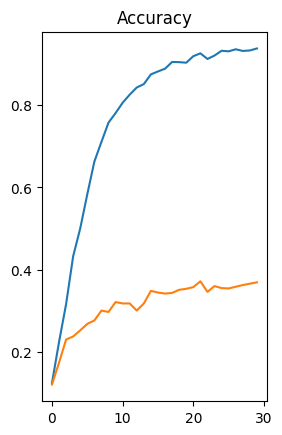

In [17]:
epoch_range = range(epoch_size) 
plt.figure(figure=(8,8)) 
plt.subplot(1,2,1) 
plt.plot(epoch_range,history.history['accuracy'],label='Training Accuracy') 
plt.plot(epoch_range,history.history['val_accuracy'],label='Val_accuracy')
plt.title('Accuracy') 

Text(0.5, 1.0, 'Loss')

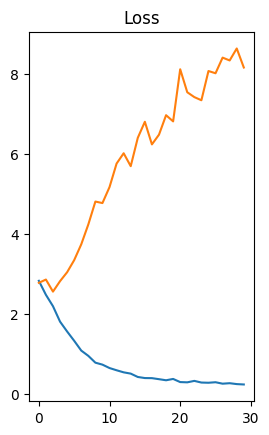

In [18]:
epoch_range = range(epoch_size) 
plt.figure(figure=(8,8)) 
plt.subplot(1,2,2) 
plt.plot(epoch_range,history.history['loss'],label='Training Loss') 
plt.plot(epoch_range,history.history['val_loss'],label='Val_loss')
plt.title('Loss') 

##### Testing the model


In [19]:
# testing
image_path="/home/azureuser/cloudfiles/code/Skin Diseases Dataset/test/actinickeratosis/actinic-keratosis (3).jpg"
image = tf.keras.utils.load_img(image_path,target_size=(img_height,img_width))
image_arr = tf.keras.utils.array_to_img(image)
image_bat = tf.expand_dims(image_arr,0)


In [20]:
# predicting
predict = model.predict(image_bat)
score = tf.nn.softmax(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


##### Displaying Test performance on unseen Image


In [21]:
print("Disease in image is {} with an accuracy of {:.2f}%".format(data_cat[np.argmax(score)], np.max(score) * 100))

Disease in image is actinickeratosis with an accuracy of 99.17%


##### Saving the model


In [22]:
model.save('Skin_Disease_Classification.keras')